In [29]:
# install jupyterthemes
#!pip install jupyterthemes

# upgrade to latest version
#!pip install --upgrade jupyterthemes

In [30]:
#!jt -t gruvboxl

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
data = 'Datasets/Air and Sea Travel Statistics/ASM01.csv'

df = pd.read_csv(data)
df

,STATISTIC Label,Month,Direction,Mode,UNIT,VALUE
0,Air and Sea Travel,2010 January,Arrivals,All modes of transport,Thousand,773.2
1,Air and Sea Travel,2010 January,Arrivals,Air,Thousand,728.4
2,Air and Sea Travel,2010 January,Arrivals,Sea,Thousand,44.8
3,Air and Sea Travel,2010 January,Departures,All modes of transport,Thousand,791.7
4,Air and Sea Travel,2010 January,Departures,Air,Thousand,732.4
...,...,...,...,...,...,...
1009,Air and Sea Travel,2024 January,Arrivals,Air,Thousand,1271.3
1010,Air and Sea Travel,2024 January,Arrivals,Sea,Thousand,31.1
1011,Air and Sea Travel,2024 January,Departures,All modes of transport,Thousand,1281.7
1012,Air and Sea Travel,2024 January,Departures,Air,Thousand,1239.5


In [33]:
# Dictionary for mapping month names to numerical order for sorting purposes
month_order = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Splitting 'Month' into 'YEAR' and 'MONTH', and mapping 'MONTH' to numerical values for sorting
df[['YEAR', 'MONTH']] = df['Month'].str.split(' ', expand=True)
df['YEAR'] = df['YEAR'].astype(int)
df['Month_Num'] = df['MONTH'].map(month_order)

# Creating a pivot table
pivot_df = df.pivot_table(
    index=['YEAR', 'Month_Num', 'MONTH'],
    columns=['Direction', 'Mode'],
    values='VALUE',
    aggfunc='sum'
)

# Joining columns and renaming appropriately
pivot_df.columns = [' '.join(col).strip() for col in pivot_df.columns.values]
pivot_df.rename(columns={
    'Arrivals All modes of transport': 'Arrivals Total',
    'Arrivals Air': 'Arrivals Air',
    'Arrivals Sea': 'Arrivals Sea',
    'Departures All modes of transport': 'Departures Total',
    'Departures Air': 'Departures Air',
    'Departures Sea': 'Departures Sea'
}, inplace=True)

# Sort by 'YEAR' and 'Month_Num' and reset index to get 'YEAR' and 'MONTH' back as columns
pivot_df_sorted = pivot_df.sort_values(by=['YEAR', 'Month_Num']).reset_index()
pivot_df_sorted.drop(columns=['Month_Num'], inplace=True)  # Removing the numerical month column

# Rearrange columns to the specified order
specified_order = ['YEAR', 'MONTH', 'Arrivals Air', 'Arrivals Sea', 'Arrivals Total', 
                   'Departures Air', 'Departures Sea', 'Departures Total']
pivot_df_sorted = pivot_df_sorted[specified_order]

In [55]:
# Dataframe organized to perform Descritive Statistics
df = pivot_df_sorted
df


,YEAR,MONTH,Arrivals Air,Arrivals Sea,Arrivals Total,Departures Air,Departures Sea,Departures Total
0,2010,January,728.4,44.8,773.2,732.4,59.3,791.7
1,2010,February,757.2,46.9,804.0,757.2,46.1,803.2
2,2010,March,906.6,83.3,989.8,919.6,81.5,1001.1
3,2010,April,735.8,168.7,904.5,709.5,172.5,882.0
4,2010,May,968.5,146.4,1114.9,977.9,132.9,1110.8
...,...,...,...,...,...,...,...,...
164,2023,September,1814.8,98.7,1913.5,1799.0,111.1,1910.1
165,2023,October,1742.1,76.5,1818.6,1752.1,77.6,1829.7
166,2023,November,1352.8,44.5,1397.4,1316.5,45.0,1361.5
167,2023,December,1362.3,71.3,1433.6,1425.0,59.8,1484.9


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              169 non-null    int64  
 1   MONTH             169 non-null    object 
 2   Arrivals Air      169 non-null    float64
 3   Arrivals Sea      169 non-null    float64
 4   Arrivals Total    169 non-null    float64
 5   Departures Air    169 non-null    float64
 6   Departures Sea    169 non-null    float64
 7   Departures Total  169 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 10.7+ KB


In [36]:
# Calculating Max Values, excluding Columns Year and Month
max_df = df.drop(columns=['YEAR', 'MONTH'])
max_df = max_df.max()

print("\nMax values for:")
print(max_df)


Max values:
Arrivals Air        2070.2
Arrivals Sea         279.5
Arrivals Total      2270.7
Departures Air      2012.4
Departures Sea       278.9
Departures Total    2194.3
dtype: float64


In [37]:
# Calculating Min Values, excluding Columns Year and Month
min_df = df.drop(columns=['YEAR', 'MONTH'])
min_df = min_df.min()

print("\nMin values for:")
print(min_df)

#print('Standard deviation of', iris_df[['sepallength']].std())

#print('Summary Statistics of', iris_df[['sepallength']].describe())

#print('Summary Statistics: All')
#iris_df.describe()


Min values:
Arrivals Air        12.1
Arrivals Sea         4.0
Arrivals Total      16.1
Departures Air      12.8
Departures Sea       4.9
Departures Total    17.8
dtype: float64


In [44]:
df

,YEAR,MONTH,Arrivals Air,Arrivals Sea,Arrivals Total,Departures Air,Departures Sea,Departures Total
0,2010,January,728.4,44.8,773.2,732.4,59.3,791.7
1,2010,February,757.2,46.9,804.0,757.2,46.1,803.2
2,2010,March,906.6,83.3,989.8,919.6,81.5,1001.1
3,2010,April,735.8,168.7,904.5,709.5,172.5,882.0
4,2010,May,968.5,146.4,1114.9,977.9,132.9,1110.8
...,...,...,...,...,...,...,...,...
164,2023,September,1814.8,98.7,1913.5,1799.0,111.1,1910.1
165,2023,October,1742.1,76.5,1818.6,1752.1,77.6,1829.7
166,2023,November,1352.8,44.5,1397.4,1316.5,45.0,1361.5
167,2023,December,1362.3,71.3,1433.6,1425.0,59.8,1484.9


In [48]:
# calculating the mean of each column excluding Year and round with 2 decimals
mean_df = df.drop(columns=['YEAR', 'MONTH'])
mean_df = mean_df.mean().round(2)

print("\nMean measurements for each column:")
mean_df


Mean measurements for each column:


Arrivals Air        1129.84
Arrivals Sea          97.66
Arrivals Total      1227.50
Departures Air      1132.35
Departures Sea        97.40
Departures Total    1229.76
dtype: float64

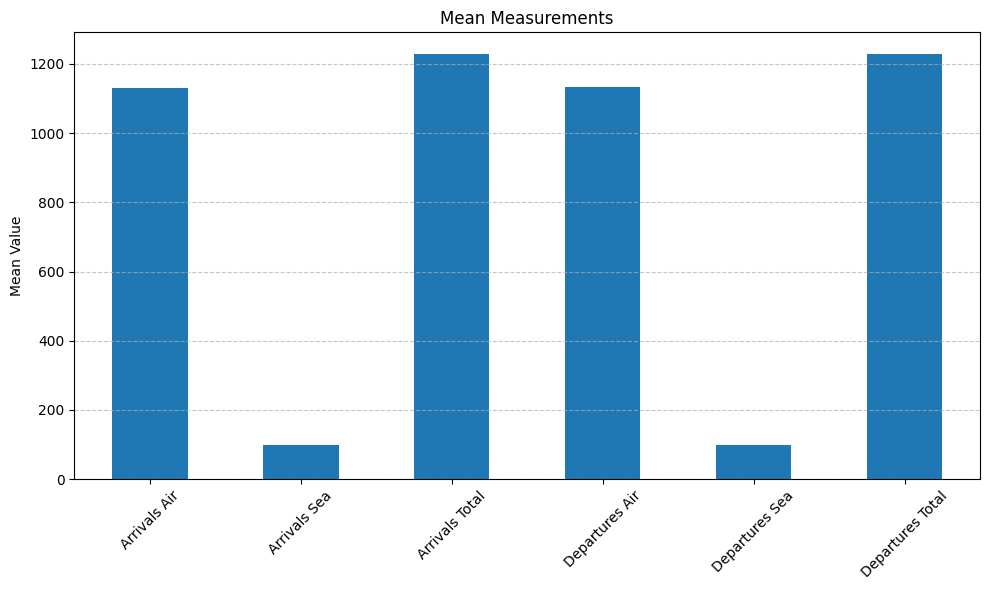

In [49]:
# Plotting the Mean bar plot
mean_df.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Measurements')
#plt.xlabel('')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [51]:
# calculating the Median of each column excluding Year and Month and round with 2 decimals
median_df = df.drop(columns=['YEAR', 'MONTH'])
median_df = median_df.median().round(2)

print("\nMedian measurements for each column:")
median_df


Median measurements for each column:


Arrivals Air        1171.7
Arrivals Sea          87.6
Arrivals Total      1236.6
Departures Air      1178.5
Departures Sea        79.8
Departures Total    1256.4
dtype: float64

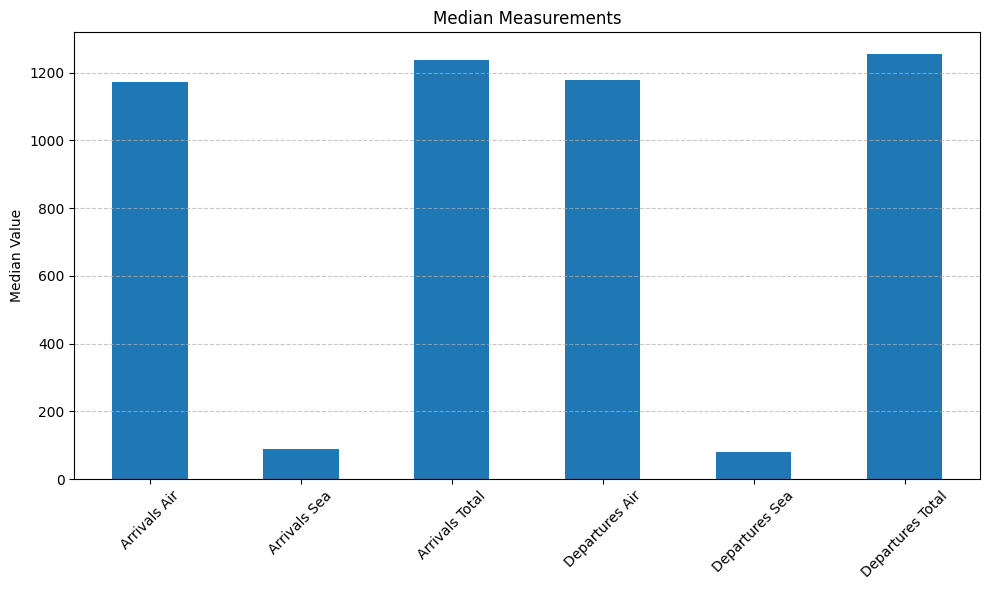

In [52]:
# Plotting the Median bar plot
median_df.plot(kind='bar', figsize=(10, 6))
plt.title('Median Measurements')
#plt.xlabel('')
plt.ylabel('Median Value')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [54]:
df_described = df.drop(columns=['YEAR','MONTH']).describe()
df_described

,Arrivals Air,Arrivals Sea,Arrivals Total,Departures Air,Departures Sea,Departures Total
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,1129.835503,97.657988,1227.495858,1132.353254,97.401183,1229.757396
std,474.693749,63.111201,518.132811,474.854512,60.381058,516.408800
min,12.100000,4.000000,16.100000,12.800000,4.900000,17.800000
25%,846.000000,48.900000,911.400000,836.500000,52.300000,895.100000
50%,1171.700000,87.600000,1236.600000,1178.500000,79.800000,1256.400000
75%,1450.300000,122.500000,1576.000000,1438.700000,127.800000,1577.600000
max,2070.200000,279.500000,2270.700000,2012.400000,278.900000,2194.300000


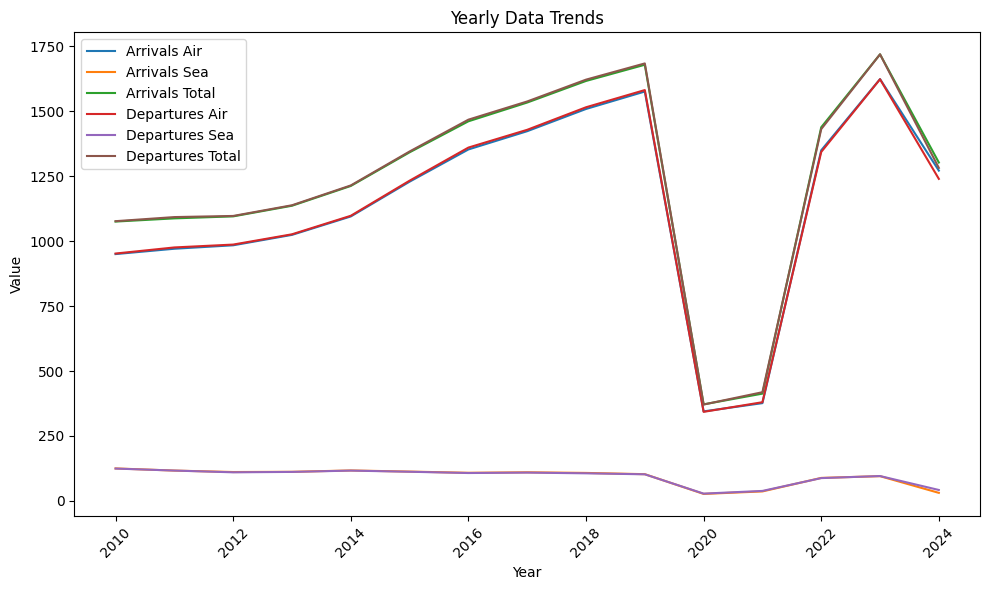

In [ ]:
x = df_pivoted['Year']
plt.figure(figsize=(10, 6))  

# Plotting each column against 'Year'
for column in df_pivoted.columns[1:]:  # Excluding 'Year' column for the x-axis
    plt.plot(x, df_pivoted[column], label=column)

# Trends x Patterns x Anomalies
plt.title('Yearly Data Trends')  # Add a title
plt.xlabel('Year')  # Label for the x-axis
plt.ylabel('Value')  # Label for the y-axis
plt.legend()  # Show legend to identify lines
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to not cut off elements
plt.show()